<a href="https://colab.research.google.com/github/gopika20nair/Solubility-Prediction-of-drug-compounds-ML-Demo/blob/main/SHAP_aqsol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost shap optuna scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys



In [ ]:
from google.colab import files

uploaded = files.upload()


Saving mordred_train.csv to mordred_train.csv
Saving mordred_test.csv to mordred_test.csv
Saving rdkit_train.csv to rdkit_train.csv
Saving rdkit_test.csv to rdkit_test.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [ ]:
feat1, feat2 = "mordred", "rdkit"
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

train1 = pd.read_csv(f"{feat1}_train.csv").replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()
test1 = pd.read_csv(f"{feat1}_test.csv").replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()
train2 = pd.read_csv(f"{feat2}_train.csv").replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()
test2 = pd.read_csv(f"{feat2}_test.csv").replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()

X_train = np.concatenate([train1, train2], axis=1)
X_test = np.concatenate([test1, test2], axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
cat_model = CatBoostRegressor(verbose=0, random_seed=42)
cat_model.fit(X_train_scaled, y_train)

features_for_select = list(range(X_train_scaled.shape[1]))
selected = cat_model.select_features(
    X=X_train_scaled, y=y_train,
    eval_set=(X_test_scaled, y_test),
    features_for_select=features_for_select,
    num_features_to_select=128,
    algorithm='RecursiveByShapValues',
    steps=5,
    train_final_model=False,
    verbose=True,
    plot=True
)
sel_idx = selected['selected_features']

X_train_sel = X_train_scaled[:, sel_idx]
X_test_sel  = X_test_scaled[:,  sel_idx]



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
Feature #1033 eliminated
Feature #1034 eliminated
Feature #1035 eliminated
Feature #1036 eliminated
Feature #1037 eliminated
Feature #1414 eliminated
Feature #1038 eliminated
Feature #1040 eliminated
Feature #1041 eliminated
Feature #1042 eliminated
Feature #1043 eliminated
Feature #1044 eliminated
Feature #1045 eliminated
Feature #1046 eliminated
Feature #1047 eliminated
Feature #1048 eliminated
Feature #1049 eliminated
Feature #1050 eliminated
Feature #1051 eliminated
Feature #1052 eliminated
Feature #1053 eliminated
Feature #1054 eliminated
Feature #1062 eliminated
Feature #1068 eliminated
Feature #1070 eliminated
Feature #1075 eliminated
Feature #1087 eliminated
Feature #1088 eliminated
Feature #1089 eliminated
Feature #1091 eliminated
Feature #1092 eliminated
Feature #1093 eliminated
Feature #1095 eliminated
Feature #1099 eliminated
Feature #1103 eliminated
Feature #1104 eliminated
Feature #1105 eliminated
Feature #1106 eliminated

In [ ]:
def objective(trial):
    params = {
        "iterations":      trial.suggest_int("iterations",  500, 1500),
        "learning_rate":   trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth":           trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg":     trial.suggest_float("l2_leaf_reg", 1.0, 10.0),
        "loss_function":   "RMSE",
        "random_seed":     42,
        "verbose":         0
    }
    m = CatBoostRegressor(**params)
    m.fit(X_train_sel, y_train)
    preds = m.predict(X_test_sel)
    return mean_squared_error(y_test, preds)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2025-04-25 11:15:38,256] A new study created in memory with name: no-name-852377e7-6e00-4dd3-965a-1cec0a65b313
[I 2025-04-25 11:19:25,072] Trial 0 finished with value: 0.7868934752087255 and parameters: {'iterations': 600, 'learning_rate': 0.15709904366860866, 'depth': 10, 'l2_leaf_reg': 7.792220555976062}. Best is trial 0 with value: 0.7868934752087255.
[I 2025-04-25 11:22:18,061] Trial 1 finished with value: 0.8182794203609146 and parameters: {'iterations': 798, 'learning_rate': 0.26418876607295694, 'depth': 9, 'l2_leaf_reg': 2.625051568279247}. Best is trial 0 with value: 0.7868934752087255.
[I 2025-04-25 11:22:46,702] Trial 2 finished with value: 0.7688387060277471 and parameters: {'iterations': 1199, 'learning_rate': 0.2746445850463622, 'depth': 5, 'l2_leaf_reg': 7.6971573121153725}. Best is trial 2 with value: 0.7688387060277471.
[I 2025-04-25 11:23:07,063] Trial 3 finished with value: 0.7633923635669537 and parameters: {'iterations': 571, 'learning_rate': 0.12952532494798472,

Best Hyperparameters: {'iterations': 1329, 'learning_rate': 0.17736003724363011, 'depth': 4, 'l2_leaf_reg': 3.7731628046908714}


In [ ]:
final_model = CatBoostRegressor(**best_params)
final_model.fit(X_train_sel, y_train)


0:	learn: 2.1368426	total: 46.1ms	remaining: 1m 1s
1:	learn: 1.9478822	total: 77.4ms	remaining: 51.3s
2:	learn: 1.8036685	total: 113ms	remaining: 50s
3:	learn: 1.6861432	total: 144ms	remaining: 47.8s
4:	learn: 1.5815121	total: 173ms	remaining: 45.9s
5:	learn: 1.5121914	total: 211ms	remaining: 46.5s
6:	learn: 1.4578504	total: 253ms	remaining: 47.7s
7:	learn: 1.4012059	total: 282ms	remaining: 46.6s
8:	learn: 1.3603396	total: 312ms	remaining: 45.8s
9:	learn: 1.3281692	total: 345ms	remaining: 45.6s
10:	learn: 1.2993561	total: 368ms	remaining: 44.1s
11:	learn: 1.2801076	total: 403ms	remaining: 44.2s
12:	learn: 1.2566096	total: 446ms	remaining: 45.1s
13:	learn: 1.2410061	total: 482ms	remaining: 45.3s
14:	learn: 1.2276582	total: 517ms	remaining: 45.3s
15:	learn: 1.2125410	total: 550ms	remaining: 45.2s
16:	learn: 1.2016622	total: 578ms	remaining: 44.6s
17:	learn: 1.1912832	total: 614ms	remaining: 44.7s
18:	learn: 1.1811045	total: 641ms	remaining: 44.2s
19:	learn: 1.1735693	total: 668ms	remaini

R²:   0.8597
RMSE: 0.8722
MAE:  0.5967
MSE:  0.7607


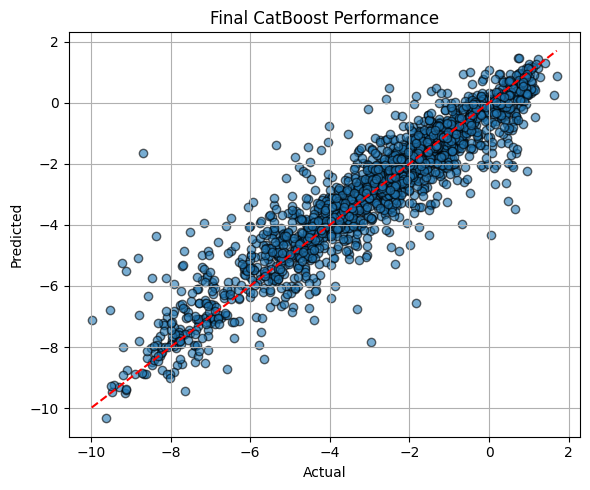

In [ ]:
y_pred = final_model.predict(X_test_sel)
print(f"R²:   {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.4f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred):.4f}")

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Final CatBoost Performance")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pip install joblib


In [ ]:
import joblib

In [ ]:
import joblib

# 1) Save the CatBoost model
joblib.dump(final_model,                 "catboost_final_model.joblib")

# 2) Save the best Optuna hyper‐parameters
joblib.dump(best_params,                 "catboost_best_params.joblib")

# 3) Save the list of selected feature indices
joblib.dump(sel_idx,                     "selected_feature_indices.joblib")

print("Artifacts saved:")
print(" • Model → catboost_final_model.joblib")
print(" • Params → catboost_best_params.joblib")
print(" • Indices → selected_feature_indices.joblib")


Artifacts saved:
 • Model → catboost_final_model.joblib
 • Params → catboost_best_params.joblib
 • Indices → selected_feature_indices.joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib, os

In [ ]:
SAVE_DIR = "/content/drive/MyDrive/solubility_models"
os.makedirs(SAVE_DIR, exist_ok=True)

In [ ]:
joblib.dump(final_model,       os.path.join(SAVE_DIR, "catboost_final_model.joblib"))
joblib.dump(best_params,       os.path.join(SAVE_DIR, "catboost_best_params.joblib"))
joblib.dump(sel_idx,           os.path.join(SAVE_DIR, "selected_feature_indices.joblib"))

print("✅ Saved all artifacts to", SAVE_DIR)

✅ Saved all artifacts to /content/drive/MyDrive/solubility_models


In [ ]:
import joblib

# 1) Save the CatBoost model
joblib.dump(final_model,                 "catboost_final_model.joblib")

# 2) Save the best Optuna hyper‐parameters
joblib.dump(best_params,                 "catboost_best_params.joblib")

# 3) Save the list of selected feature indices
joblib.dump(sel_idx,                     "selected_feature_indices.joblib")

['selected_feature_indices.joblib']

In [ ]:
# ===== Cell 4: Save Model & Selected Features =====
import pickle

# 1) Save CatBoost binary
final_model.save_model("catboost_final_model.cbm")

# 2) Save Optuna parameters
with open("catboost_best_params.pkl", "wb") as f:
    pickle.dump(best_params, f)

# 3) Save selected feature indices
np.save("selected_features.npy", np.array(sel_idx))

# 4) Download artifacts
files.download("catboost_final_model.cbm")
files.download("catboost_best_params.pkl")
files.download("selected_features.npy")


In [ ]:
from google.colab import files
uploaded = files.upload()